In [1]:
from urllib.request import urlretrieve
urlretrieve(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
    "winequality-white.csv")

('winequality-white.csv', <http.client.HTTPMessage at 0x22fa8963ba8>)

In [4]:
import pandas as pd
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


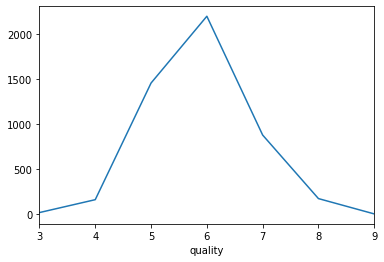

In [6]:
import matplotlib.pyplot as plt

# 品質データごとにグループ分けして、その数を数える
count_data = wine.groupby('quality')["quality"].count()
print(count_data)

# 数えたデータをグラフに描画
count_data.plot()
plt.savefig("wine-count-plt.png")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

# データをラベルとデータに分離
y = wine["quality"]
x = wine.drop("quality", axis=1)

# 学習用とテスト用に分割する
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 学習する
model = RandomForestClassifier()
model.fit(x_train, y_train)

# 評価する
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.6795918367346939


C:\Users\0190711653\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
# yのラベルをつけ直す
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
y = newlist

# 学習用とテスト用に分割する
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 学習する
model = RandomForestClassifier()
model.fit(x_train, y_train)

# 評価する
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9346938775510204


C:\Users\0190711653\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


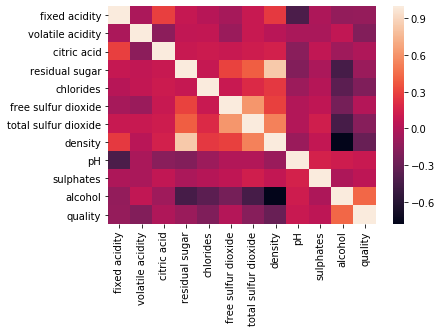

In [11]:
import seaborn as sns

# 結果を図に表示
corr = wine.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [54]:
x_test.iloc[0:1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2177,6.0,0.34,0.24,5.4,0.06,23.0,126.0,0.9951,3.25,0.44,9.0


In [56]:
model.predict(x_test.iloc[32:33])

array([2])

In [35]:
from sklearn.externals import joblib
joblib.dump(model, 'wine.pkl')

C:\Users\0190711653\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['wine.pkl']

In [36]:
model_2 = joblib.load('wine.pkl')
model_2.predict(x_test.iloc[32:33])

array([2])

In [40]:
import json

req = json.loads("{\"fixed acidity\":1,\"volatile acidity\":1,\"citric acid\":1,\"residual sugar\":1,\"chlorides\":1,\"free sulfur dioxide\":1,\"total sulfur dioxide\":1,\"density\":1,\"pH\":1,\"sulphates\":1,\"alcohol\":1}")
req

{'fixed acidity': 1,
 'volatile acidity': 1,
 'citric acid': 1,
 'residual sugar': 1,
 'chlorides': 1,
 'free sulfur dioxide': 1,
 'total sulfur dioxide': 1,
 'density': 1,
 'pH': 1,
 'sulphates': 1,
 'alcohol': 1}

In [53]:
input = pd.DataFrame.from_dict(req, orient='index').T
model_2.predict(input)

array([0])